## Objective:

To forecast Canadian house prices by analyzing the relationship between average Canadian household income and house prices over the past 20 years.

## Adding one more dataset
Data from statistic Canada :https://www150.statcan.gc.ca/n1/pub/71-607-x/71-607-x2019007-eng.htm 
It contains median income from year of 2003 to 2022

- Adding income data and merged into previous data(house price)
- Data Exploration

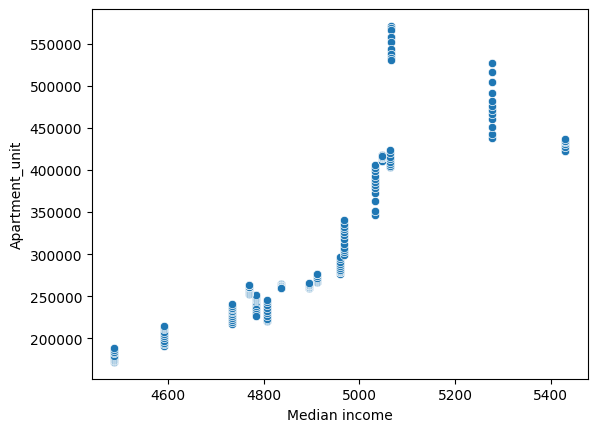

Pearson correlation coefficient: 0.84
p-value: 8.08047519421907e-59


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

class IncomeDataProcessor:
    """
    A class to process income and house price data.
    """

    def __init__(self, income_data_path, original_data_path):
        """
        Initializes the class with the given data paths.

        Args:
            income_data_path (str): Path to the income data CSV file.
            original_data_path (str): Path to the original data Excel file.
        """
        self.income_data = pd.read_csv(income_data_path)
        self.original_data = pd.read_excel(original_data_path)

    def clean_data(self):
        """
        Cleans the income data by removing currency symbols and converting to numeric.
        """
        self.income_data['Median income'] = self.income_data['Median income'].str.replace('$', '').str.replace(',', '').astype(float)

    def convert_to_monthly(self):
        """
        Converts annual income to monthly income and creates a new DataFrame.
        """
        # Create a list to store new data
        new_rows = []
        
        # Loop for income data
        for index, row in self.income_data.iterrows():
            year = row["Reference year"]
            median_income = row["Median income"] / 12  # Convert to monthly income
            
            for month in range(1, 13):
                date_str = f"{year}-{month:02d}-01"
                date = pd.to_datetime(date_str, format='%Y-%m-%d')
                
                new_row = {
                    "Date": date,
                    "Median income": median_income,
                    "Count of families": row["Count of families"],
                    "Family type": row["Family type"],
                    "Geography": row["Geography"],
                    "Selected income concept": row["Selected income concept"]
                }
                new_rows.append(new_row)
        
        # Create new DataFrame and store it as monthly_data
        self.monthly_data = pd.DataFrame(new_rows)
        
        return self.monthly_data
    def merge_data(self):
        """
        Merges the income data with the original data based on the 'Date' column.
        """
        self.monthly_data['Date'] = pd.to_datetime(self.monthly_data['Date'], format='%Y-%m-%d')
        newdata = pd.merge(self.original_data, self.monthly_data[['Date', 'Median income']], on='Date', how='left')
        self.merged_data = newdata.head(215)

    def exploratory_data_analysis(self):
        """
        Performs exploratory data analysis, including:
            - Visualizing the relationship between income and house price
            - Calculating correlation coefficient and p-value
            - Fitting a linear regression model
        """
        # Visualize relationship
        sns.scatterplot(x='Median income', y='Apartment_unit', data=self.merged_data)
        plt.show()

        # Correlation analysis
        corr, p_value = stats.pearsonr(self.merged_data['Median income'], self.merged_data['Apartment_unit'])
        print(f'Pearson correlation coefficient: {corr:.2f}')
        print(f'p-value: {p_value}')

    def save_data(self, output_path):
        """
        Saves the merged data to a CSV file.
        """
        self.merged_data.to_csv(output_path, index=False)

# Example usage
processor = IncomeDataProcessor('incomedata.csv', 'News_release_chart_data_August_2024.xlsx')
processor.clean_data()
processor.convert_to_monthly()
processor.merge_data()
processor.exploratory_data_analysis()
processor.save_data('mergeddata.csv')


## Hypothesis Testing :

Null Hypothesis (H0): There is no significant linear correlation between average Canadian household income and house prices.

Alternative Hypothesis (H1): There is a significant positive linear correlation between average Canadian household income and house prices (i.e., as income increases, house prices also increase).

## The Spearman coefficient statistical test is chosen
- The data does not have a normal distribution
- They are cardinal data

## Summary

- Spearman coefficient 0.84: Indicates that, in general, as median income increases, apartment unit prices (Apartment_unit) also tend to increase.
- p_value: 8.08047519421907e-59: This value is much lower than the common significance level of α=0.05. This means that there is sufficient evidence to reject the null hypothesis and conclude that there is a significant correlation.
- **Conclusion:**
    - The null hypothesis is rejected: There is a significant correlation between apartment prices and median income.
    - The correlation is strong, suggesting that as median income increases, apartment unit prices also tend to increase.